In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lib(FileName):
    def openFile(FileName):
        read_data = open(f'{FileName}')
        data = read_data.read()
        data = data.splitlines()
        read_data.close()
        
        return data
        
    lib = {}
    
    for lines in openFile(FileName):
        if lines != 'CloneID Familienummer':
            line = lines.split()
            if len(line[1:]) == 1:
                lib[int(line[0])] = int(line[1])
            else:
                lib[int(line[0])] = line[1:]
            
    return lib
            
lib_family = lib('..\Data\CloneIdFamily.txt')
lib_clust = lib('..\Data\kmca_results.txt')

C:\Users\20203928\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\20203928\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\20203928\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\20203928\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a de

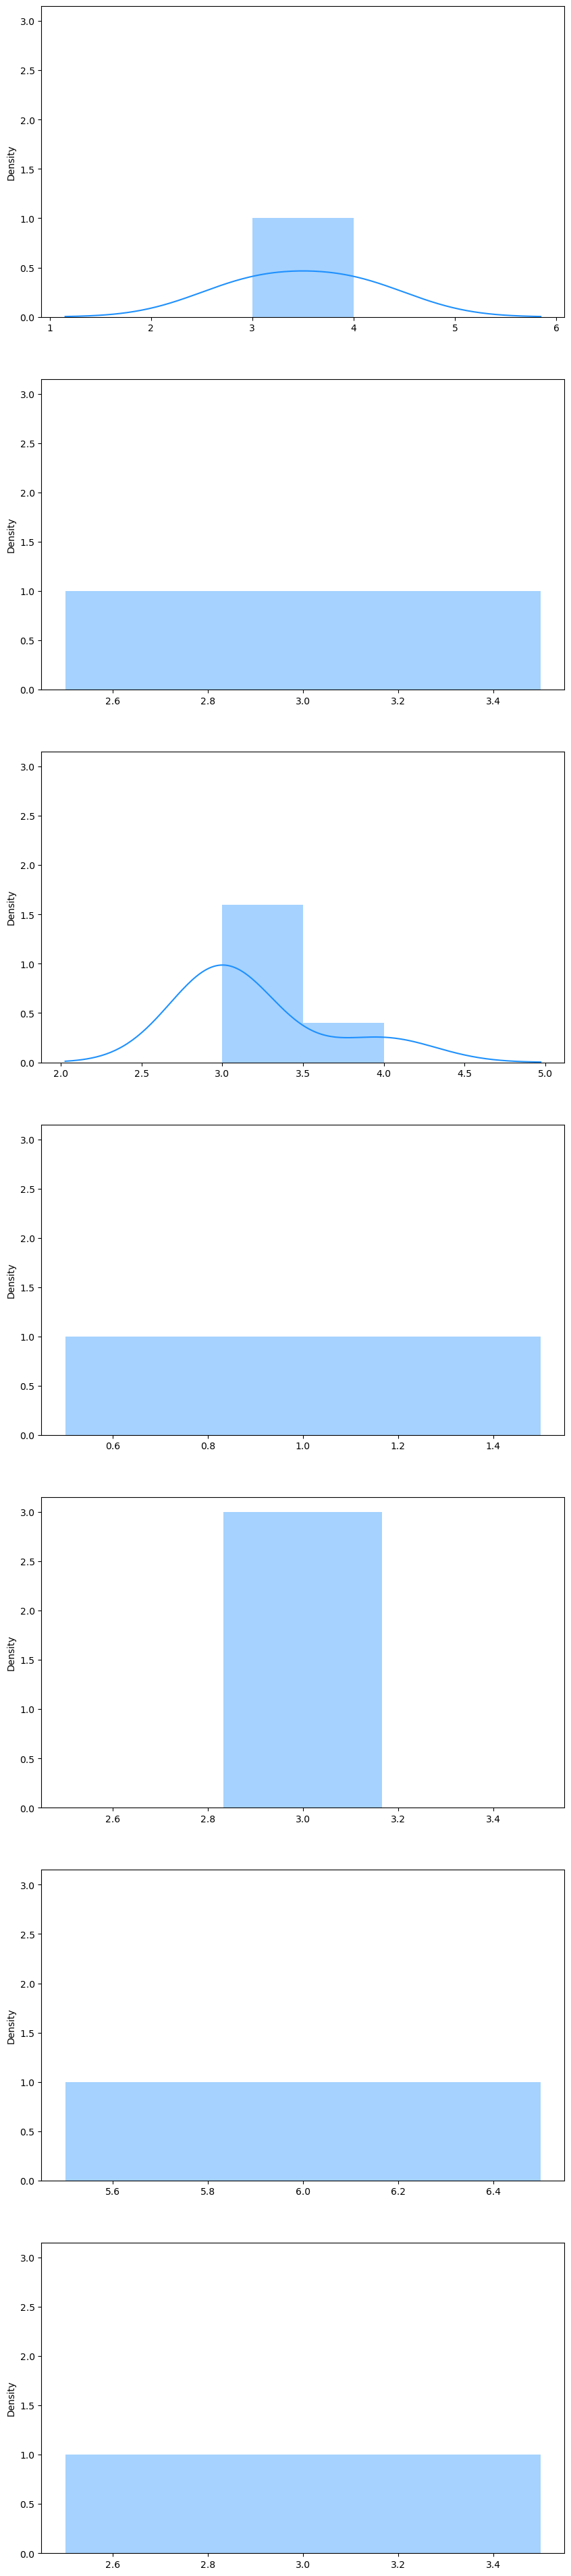

In [52]:
def making_histograms(data_fam, data_clust):
    fam_clust = {}
    nr_of_familys = max(list(data_fam.values()))
    
    for family in range(1,nr_of_familys+1):
        clusters = []
        IDs = [ID  for (ID, value) in data_fam.items() if value == family]
        for ID in IDs:
            if ID in list(data_clust.keys()):
                clusters.append(data_clust[ID])
        fam_clust[family] = clusters
        
    aantal_plotjes = 0
    for family in list(fam_clust.keys()):
        if fam_clust != []:
            aantal_plotjes += 1
            
    fig, axes = plt.subplots(ncols=1,nrows=7, figsize=(10,50), sharey=True, dpi=100)
    plot=0
    for family in list(fam_clust.keys()):
        if fam_clust[family] != []:
            df = pd.DataFrame.from_dict(fam_clust[family])
            sns.distplot(df,color="dodgerblue",ax=axes[plot])
            plot += 1
    
    

making_histograms(lib_family, lib_clust)